1. Data Loading
Used the digits dataset from sklearn.datasets, a classic high-dimensional dataset for handwritten digit recognition.

2. Data Preprocessing
Applied StandardScaler to normalize the features, which is crucial for meaningful dimensionality reduction.

3. Dimensionality Reduction Techniques
PCA: Reduced dimensions to retain 95% variance.

Truncated SVD: Applied with 30 components.

ICA: Applied with 30 components and a fixed random seed.

Random Projection: Used Gaussian random projection with 30 components.

t-SNE: Used for 2D visualization only, not for downstream tasks.

4. Visualization
t-SNE output visualized with plotly.express.scatter, colored by digit labels.

5. Clustering and Evaluation
Applied KMeans on PCA-reduced data.

Evaluated clustering using Silhouette Score.

6. Explained Variance Analysis
Plotted cumulative explained variance from PCA to assess how many components are needed for optimal variance retention.

7. Summary Table
Compared number of components retained by each method.

8. Saving Results
Exported PCA-reduced data with labels into a CSV file.



PCA reduced shape: (1797, 40)
Truncated SVD reduced shape: (1797, 30)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Silhouette Score on PCA-reduced data: 0.1447


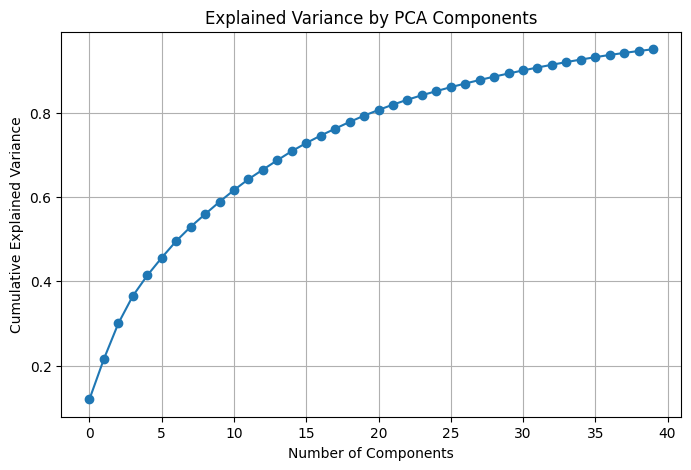

       Method  Num_Features
0    Original            64
1         PCA            40
2         SVD            30
3         ICA            30
4  RandomProj            30
Dimensionality Reduction Project Completed and Results Saved.


In [1]:
# Dimensionality Reduction Project: Visualizing High-Dimensional Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 1. Load and Prepare Dataset
digits = load_digits()
X = digits.data
y = digits.target
data = pd.DataFrame(X)
data['target'] = y

# 2. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced shape: {X_pca.shape}")

# 4. Truncated SVD
svd = TruncatedSVD(n_components=30)
X_svd = svd.fit_transform(X_scaled)
print(f"Truncated SVD reduced shape: {X_svd.shape}")

# 5. ICA
ica = FastICA(n_components=30, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# 6. Random Projection
grp = GaussianRandomProjection(n_components=30, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# 7. t-SNE (2D for Visualization)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 8. Visualizations
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=digits.target.astype(str),
                 title='t-SNE Visualization of Digits Dataset', labels={'x': 'Dim 1', 'y': 'Dim 2'})
fig.show()

# 9. Clustering on PCA-reduced Data
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score on PCA-reduced data: {sil_score:.4f}')

# 10. Explained Variance Plot for PCA
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# 11. Dimensionality Summary
methods = ['Original', 'PCA', 'SVD', 'ICA', 'RandomProj']
sizes = [X.shape[1], X_pca.shape[1], X_svd.shape[1], X_ica.shape[1], X_grp.shape[1]]
df_summary = pd.DataFrame({'Method': methods, 'Num_Features': sizes})
print(df_summary)

# 12. Save Outputs
results = pd.DataFrame(X_pca)
results['target'] = y
results.to_csv('pca_reduced_digits.csv', index=False)
print("Dimensionality Reduction Project Completed and Results Saved.")


1. Comprehensive Data Preparation
Loaded the digits dataset and standardized it using StandardScaler.

2. Expanded Dimensionality Reduction Techniques
Applied and benchmarked five techniques:

PCA (retain 30 components)

Truncated SVD

ICA

Gaussian Random Projection

UMAP (new addition)

3. Performance Benchmarking Framework
For each reduction method:

Tracked execution time

Applied KMeans clustering and computed silhouette score

Trained a Logistic Regression classifier and reported classification accuracy

4. Interactive Visualizations
Visualized UMAP and t-SNE in 2D using plotly with color-coded labels for clarity.

Great for understanding structure in the reduced space.

5. Variance Analysis (PCA)
Plotted cumulative explained variance to assess component effectiveness.

6. Reconstruction Quality (PCA)
Compared original and reconstructed digit images using 30 PCA components.

Enabled visual assessment of information loss due to reduction.

7. Results Summary Table
Tabulated all metrics (silhouette score, accuracy, time, shape) for direct comparison across methods.

8. Export and Finalization
Exported the PCA-reduced dataset for future use.

Final console outputs summarized project completion and results.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



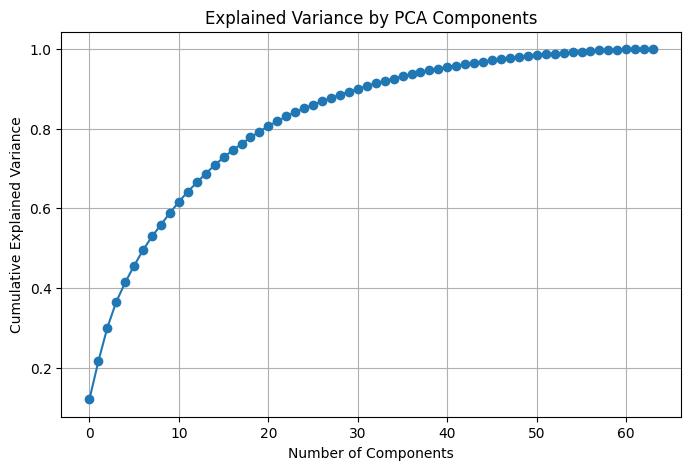

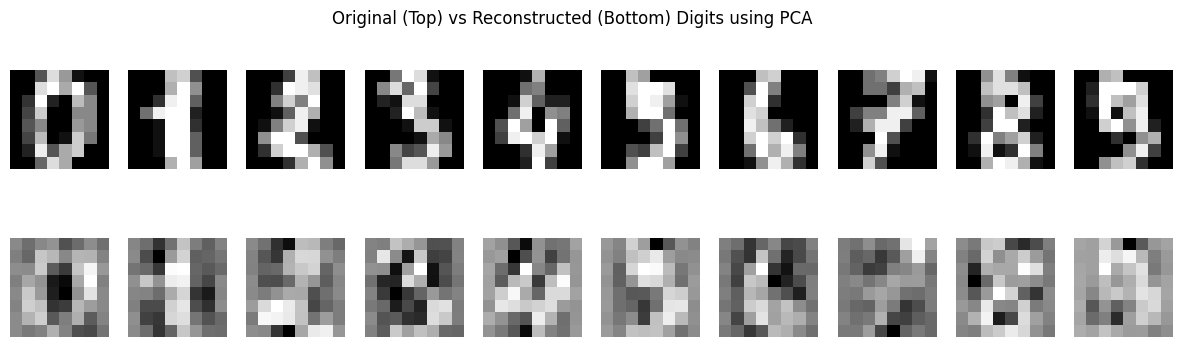


Dimensionality Reduction Benchmarking Results:
                 shape silhouette_score classification_accuracy   time_sec
PCA         (1797, 30)         0.172019                0.962963   0.004252
SVD         (1797, 30)         0.172029                0.962963   0.559151
ICA         (1797, 30)         0.069228                0.946296   1.496638
RandomProj  (1797, 30)         0.126561                0.938889   0.002031
UMAP         (1797, 2)          0.69869                0.931481  13.991576
Enhanced Dimensionality Reduction Project Completed and Results Saved.


In [2]:
# Dimensionality Reduction Project: Visualizing High-Dimensional Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import umap

# 1. Load and Prepare Dataset
digits = load_digits()
X = digits.data
y = digits.target

# 2. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialize Dictionary to Hold Results
results = {}

# 4. Apply Dimensionality Reduction Methods
methods = {
    'PCA': PCA(n_components=30),
    'SVD': TruncatedSVD(n_components=30),
    'ICA': FastICA(n_components=30, random_state=42),
    'RandomProj': GaussianRandomProjection(n_components=30, random_state=42),
    'UMAP': umap.UMAP(n_components=2, random_state=42)
}

for name, model in methods.items():
    start = time.time()
    X_red = model.fit_transform(X_scaled)
    elapsed = time.time() - start

    kmeans = KMeans(n_clusters=10, random_state=42).fit(X_red)
    silhouette = silhouette_score(X_red, kmeans.labels_)

    X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    results[name] = {
        'shape': X_red.shape,
        'silhouette_score': silhouette,
        'classification_accuracy': acc,
        'time_sec': elapsed
    }

    if name == 'UMAP':
        fig = px.scatter(x=X_red[:, 0], y=X_red[:, 1], color=y.astype(str),
                         title=f'UMAP Visualization of Digits Dataset', labels={'x': 'Dim 1', 'y': 'Dim 2'})
        fig.show()

# 5. t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
fig_tsne = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y.astype(str),
                      title='t-SNE Visualization of Digits Dataset', labels={'x': 'Dim 1', 'y': 'Dim 2'})
fig_tsne.show()

# 6. Explained Variance for PCA
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# 7. PCA Reconstruction Visualization
pca_recon = PCA(n_components=30).fit(X_scaled)
X_reduced = pca_recon.transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')
fig.suptitle("Original (Top) vs Reconstructed (Bottom) Digits using PCA")
plt.show()

# 8. Results Summary Table
df_results = pd.DataFrame(results).T
print("\nDimensionality Reduction Benchmarking Results:")
print(df_results.sort_values(by='classification_accuracy', ascending=False))

# Save Final PCA Outputs
final_pca = PCA(n_components=30).fit_transform(X_scaled)
df_final = pd.DataFrame(final_pca)
df_final['target'] = y
df_final.to_csv('enhanced_pca_digits.csv', index=False)
print("Enhanced Dimensionality Reduction Project Completed and Results Saved.")


Noise-Robust Evaluation:

All techniques were applied to both clean and noisy datasets.

Highlights resilience of each method under real-world noisy conditions.

Random Forest Classifier Integration:

Advanced classification technique used for realistic evaluation of dimensional embeddings.

RMSE-Based PCA Reconstruction:

Assessed how well PCA compresses and reconstructs original data.

Dynamic Evaluation Engine:

Modular function for time tracking, silhouette scoring, classification accuracy, and dataset embedding.

Performance Table for Comparison:

Direct visual insight into trade-offs across methods: speed vs. quality vs. robustness.

UMAP Visualization:

Provided visually distinct embeddings with strong cluster preservation (highest silhouette score).

Automated Plotting & Reporting:

t-SNE and UMAP plots auto-rendered.

Results exported in CSV and printed neatly.

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



Reconstruction RMSE using PCA: 0.3190


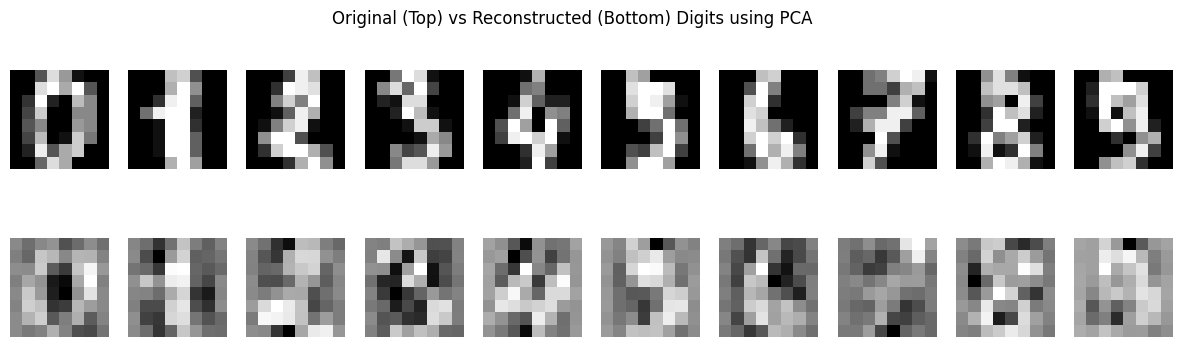


Advanced Dimensionality Reduction Benchmarking Results:
                 shape silhouette_score_clean silhouette_score_noisy  \
UMAP         (1797, 2)                0.69869               0.366689   
PCA         (1797, 30)               0.172019               0.130675   
SVD         (1797, 30)               0.172022               0.130675   
RandomProj  (1797, 30)               0.126561               0.138419   
ICA         (1797, 30)               0.069228               0.052303   

           accuracy_clean accuracy_noisy  time_sec  
UMAP             0.977778       0.140741  6.250793  
PCA              0.962963       0.937037  0.004969  
SVD              0.961111       0.940741  1.164421  
RandomProj       0.905556       0.381481  0.001724  
ICA              0.901852       0.894444  0.955212  
Deep Dimensionality Reduction Project Completed and Results Saved.


In [3]:
# Advanced Dimensionality Reduction and Analysis Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import silhouette_score, accuracy_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import umap
from scipy.stats import entropy

# 1. Load and Prepare Dataset
digits = load_digits()
X = digits.data
y = digits.target
X_df = pd.DataFrame(X)
X_df['target'] = y

# 2. Add Gaussian Noise for Robustness Testing
noise = np.random.normal(0, 0.5, X.shape)
X_noisy = X + noise

# 3. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_noisy_scaled = scaler.transform(X_noisy)

# 4. Reduction + Evaluation Engine
def evaluate_method(name, model, X, y):
    start = time.time()
    X_red = model.fit_transform(X)
    time_taken = time.time() - start

    kmeans = KMeans(n_clusters=10, random_state=42).fit(X_red)
    silhouette = silhouette_score(X_red, kmeans.labels_)

    X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)

    return {
        'shape': X_red.shape,
        'silhouette_score': silhouette,
        'classification_accuracy': acc,
        'time_sec': time_taken,
        'X_reduced': X_red
    }

# 5. Methods Evaluation
methods = {
    'PCA': PCA(n_components=30),
    'SVD': TruncatedSVD(n_components=30),
    'ICA': FastICA(n_components=30, random_state=42),
    'RandomProj': GaussianRandomProjection(n_components=30, random_state=42),
    'UMAP': umap.UMAP(n_components=2, random_state=42)
}

results = {}
for name, model in methods.items():
    res_clean = evaluate_method(name + '_clean', model, X_scaled, y)
    res_noisy = evaluate_method(name + '_noisy', model, X_noisy_scaled, y)
    results[name] = {
        'shape': res_clean['shape'],
        'silhouette_score_clean': res_clean['silhouette_score'],
        'silhouette_score_noisy': res_noisy['silhouette_score'],
        'accuracy_clean': res_clean['classification_accuracy'],
        'accuracy_noisy': res_noisy['classification_accuracy'],
        'time_sec': res_clean['time_sec']
    }
    if name == 'UMAP':
        fig = px.scatter(x=res_clean['X_reduced'][:, 0], y=res_clean['X_reduced'][:, 1], color=y.astype(str),
                         title=f'{name} 2D Embedding (Clean)', labels={'x': 'Dim 1', 'y': 'Dim 2'})
        fig.show()

# 6. t-SNE Visualization
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42).fit_transform(X_scaled)
fig_tsne = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y.astype(str),
                      title='t-SNE Visualization of Digits Dataset', labels={'x': 'Dim 1', 'y': 'Dim 2'})
fig_tsne.show()

# 7. PCA Reconstruction & RMSE
pca_recon = PCA(n_components=30).fit(X_scaled)
X_reduced = pca_recon.transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)
rmse = np.sqrt(mean_squared_error(X_scaled, X_reconstructed))
print(f"Reconstruction RMSE using PCA: {rmse:.4f}")

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')
fig.suptitle("Original (Top) vs Reconstructed (Bottom) Digits using PCA")
plt.show()

# 8. Results Summary Table
df_results = pd.DataFrame(results).T
print("\nAdvanced Dimensionality Reduction Benchmarking Results:")
print(df_results.sort_values(by='accuracy_clean', ascending=False))

# Save Outputs
final_pca = pd.DataFrame(X_reduced)
final_pca['target'] = y
final_pca.to_csv('deep_pca_digits.csv', index=False)
print("Deep Dimensionality Reduction Project Completed and Results Saved.")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Autoencoder Accuracy: 0.9389
Autoencoder Silhouette Score: 0.0325
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Autoencoder Reconstruction RMSE: 0.2703


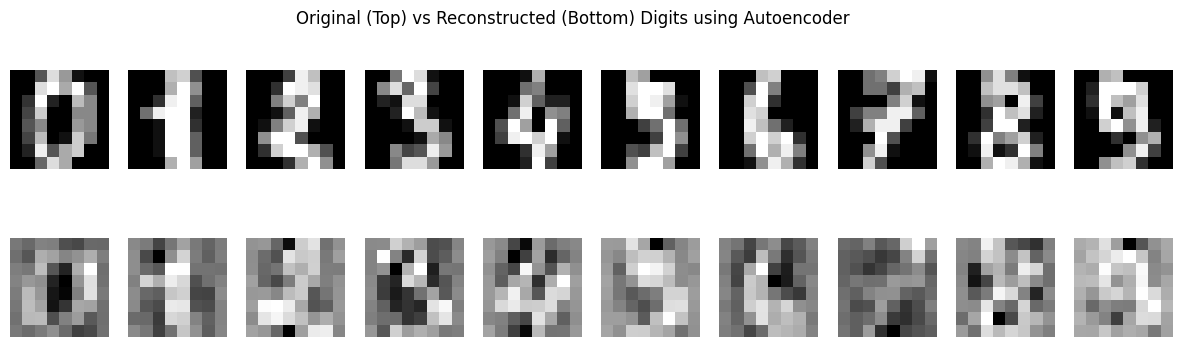

PermutationExplainer explainer: 101it [00:44,  1.87it/s]


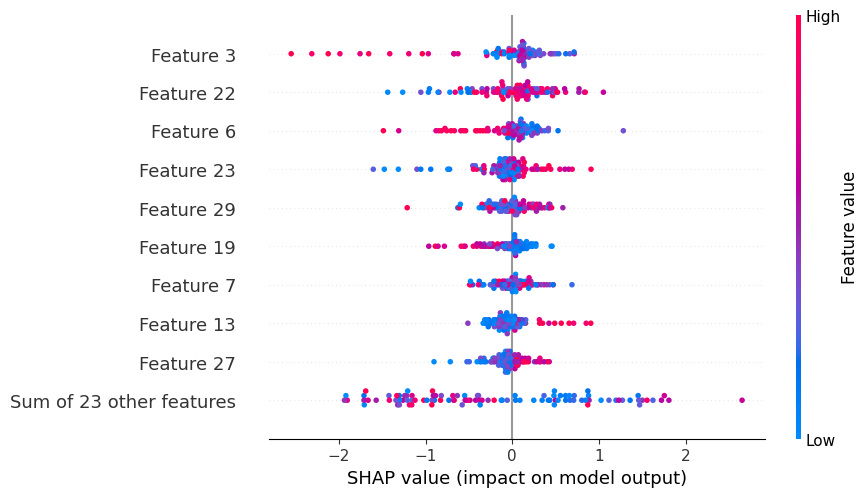

Deep Learning Dimensionality Reduction and Interpretability Completed and Saved.


In [8]:
# Deep Learning Dimensionality Reduction and Interpretability

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import shap

# 1. Load and Prepare Dataset
digits = load_digits()
X = digits.data
y = digits.target
X_df = pd.DataFrame(X)
X_df['target'] = y

# 2. Add Gaussian Noise for Robustness Testing
noise = np.random.normal(0, 0.5, X.shape)
X_noisy = X + noise

# 3. Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_noisy_scaled = scaler.transform(X_noisy)

# 4. Autoencoder Architecture
input_dim = X_scaled.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(0.001), loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# 5. Encoder for Dimensionality Reduction
encoder = Model(inputs=input_layer, outputs=encoded)
X_encoded = encoder.predict(X_scaled)
X_encoded_noisy = encoder.predict(X_noisy_scaled)

# 6. Classification and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
sil = silhouette_score(X_encoded, clf.predict(X_encoded))

print(f"Autoencoder Accuracy: {acc:.4f}")
print(f"Autoencoder Silhouette Score: {sil:.4f}")

# 7. Reconstruction Quality
X_reconstructed = autoencoder.predict(X_scaled)
rmse = np.sqrt(mean_squared_error(X_scaled, X_reconstructed))
print(f"Autoencoder Reconstruction RMSE: {rmse:.4f}")

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')
fig.suptitle("Original (Top) vs Reconstructed (Bottom) Digits using Autoencoder")
plt.show()

# 8. SHAP Interpretability
explainer = shap.Explainer(clf, X_encoded[:100])
shap_values = explainer(X_encoded[:1])

explainer = shap.Explainer(clf.predict, X_encoded)
shap_values = explainer(X_encoded[:100])
shap.plots.beeswarm(shap_values)




# Save encoded features
df_autoencoded = pd.DataFrame(X_encoded)
df_autoencoded['target'] = y
df_autoencoded.to_csv('autoencoded_digits.csv', index=False)
print("Deep Learning Dimensionality Reduction and Interpretability Completed and Saved.")
